In [1]:
from matplotlib import pyplot as plt
import numpy as np

# An example notebook: Plotting a difference equation

We will demonstrate the use of IPython notebooks by plotting a series of values generated by a difference equation.

## Markdown

This 'cell' of the notebook is written in *markdown*, a language that adds some simple formatting to plain text. Double-click on this cell to see the underlying markdown that produced the formatted output. For example:

* The title above is prefaced with a hash symbol `#`.
* The sub-heading is prefaced with two hash symbols. You can go on adding sub-sub-headings with more hash smybols.
* The phrase 'markdown' is rendered in italics by surrounding it in single asterisks `* *`.
* This bulleted list is composed of lines of text each prefaced with an asterisk.
* References to code within the text (such as `#` and `*`) are enclosed in 'backticks' `` ` ` ``.

You can read a more comprehensive list of markdown formatting symbols [here](https://www.markdownguide.org/cheat-sheet/). (And that link was created by enclosing the linked text in square parentheses `[]` followed by the address to the link in round parentheses `()`.)

In [2]:
# This cell is normal Python code, not markdown.
# We can write comments using # as we normally would, but this is not necessary as often.
# Instead, we can use the markdown cells to provide explanation in a more easily readable format.

# Any output from the Python code is displayed below the cell.
# For example:

print('Testing, testing.')

Testing, testing.


## The equation

Now let's show the equation we want to plot. It comes from a fun article:

McCloskey (1991). 'History, differential equations, and the problem of narration'. *History and Theory*. DOI: [10.2307/2505289](https://doi.org/10.2307/2505289)

The equation describes the change in a quantity $x$ from one time point to the next:

$$
x_{t+1} = \beta \times x_t \times (1 - x_t)
$$

$x$ could for example represent the size of a population of organisms, which fluctuates over time, increasing when the population is small and there are surplus resources, but decreasing when the population is large and there is competition for resources or increased predation.

The equation displayed above was formatted using yet another text formatting language, *MathJax*. Double-click this cell to see the underlying code. MathJax code is enclosed in single dollar symbols `$ $` for 'inline' equations (i.e. within a sentence of normal text), and in double dollar symbols `$$ $$` for a stand-alone equation.

Our first task is to turn this equation into a Python function, using the numpy library, which we imported at the top of the notebook, as we would in a normal Python program. If you need to brush up on numpy, try [this tutorial](https://www.numpy.org/devdocs/user/quickstart.html).

I will use the variable `y` to store the array of $x$ values, and use the index `i` for the time steps $t$. Apologies for the confusion, but this is so that I have a chance of finally playing the Geordie accent joke if I ever show this notebook to [Eugene McSorley](https://www.reading.ac.uk/psychology/about/staff/e-mcsorley.aspx) and ask him to read the part that includes `y[i]`.

In [3]:
def hump(n, y0, beta):
    """
    Generate a time series according to the difference equation: y[i+1] = beta * y[i] * (1 - y[i])
    
    Arguments:
    n    -- int number of time steps
    y0   -- float starting value of y at time 0 (suggested values between 0. and 1.)
    beta -- float tuning parameter governing the form of the time series (suggested values between 0. and 4.)
    
    Returns:
    1D numpy array of float y values
    """
    y = np.full(n, 0.)
    y[0] = y0
    for i in range(1,n):
        y[i] = beta * y[i-1] * (1 - y[i-1])
    return y

Let's call up the docstring for our function to check that that part has worked.

In [4]:
help(hump)

Help on function hump in module __main__:

hump(n, y0, beta)
    Generate a time series according to the difference equation: y[i+1] = beta * y[i] * (1 - y[i])
    
    Arguments:
    n    -- int number of time steps
    y0   -- float starting value of y at time 0 (suggested values between 0. and 1.)
    beta -- float tuning parameter governing the form of the time series (suggested values between 0. and 4.)
    
    Returns:
    1D numpy array of float y values



And now let's generate a time series with some example values, and check that it looks reasonable. To make extra sure that things have worked out as we wished, let's also check that `y` is really a numpy array, and check its `shape` and `dtype` attributes.

In [5]:
y = hump(40, 0.5, 3.)

print(type(y))
print(y.shape)
print(y.dtype)
print(y)

<class 'numpy.ndarray'>
(40,)
float64
[ 0.5         0.75        0.5625      0.73828125  0.57966614  0.73095992
  0.58997255  0.72571482  0.59715846  0.7216807   0.602573    0.71843634
  0.6068567   0.71574494  0.61036236  0.71346045  0.61330391  0.71148667
  0.61582017  0.70975707  0.61800592  0.70822381  0.61992853  0.70685144
  0.62163745  0.705613    0.62316989  0.70448754  0.62455454  0.7034585
  0.62581392  0.70251257  0.62696597  0.70163892  0.62802523  0.70082862
  0.6290036   0.70007422  0.62991092  0.69936946]


Good. The `shape` attribute tells us that the array has only a row dimension (if it also had a column dimension we would see a tuple of the form `(nrows,ncolumns)` as the shape attribute), and that there are `n` rows, and the `dytpe` attribute tells us that the values are of type `float`, although of course we also see both of these things from the printout of the array itself.

## A plot

Now we want to plot the time series. We can see already from eyeballing the numbers that the value fluctuates up and down over time, so we have an idea of what the plot should look like.

For a simple plot like this, we can use the basic plotting functions from matplotlib.pyplot, which we imported at the beginning of the notebook. Ending with `plt.show()` ensures that the plot is displayed once it is ready. If you need to brush up on matplotlib, try [these tutorials](https://matplotlib.org/tutorials/index.html).

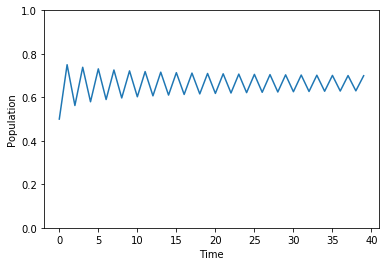

In [6]:
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Population')
plt.ylim(0., 1.)
plt.show()

And we are done with our demonstration.

## Exercise

For $\beta = 3$ the time series looks fairly orderly and seems to converge on a specific value. But in the article linked above, McCloskey cites this as an example of a 'chaotic' function, one whose development can change drastically with small changes in the input parameters. Try editing the notebook and running it again with different values of `beta` to see when the time series becomes more disorderly.